In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd # needs at least version 1.5 to use the smoothing scheme here
import scanpy as sc
from sklearn.preprocessing import normalize, MinMaxScaler

In [2]:
sc.set_figure_params(figsize=(8, 8))

In [3]:
sns.set_style("whitegrid", {'axes.grid' : False})

In [4]:
adata = sc.read_h5ad('/project2/gilad/jpopp/ebQTL/data/trajectory_inference/eb-cm_lineage/eb-cm_lineage.15binstrimmed_pseudotime.adata')

In [5]:
marker_expression = sc.get.obs_df(adata, ['NANOG','MIXL1','MESP1','GATA4','TNNT2', 'pseudotime']).sort_values('pseudotime')

In [9]:
window = round(marker_expression.shape[0]/10)
step = round(window/4)
smoothed_expression = marker_expression.rolling(window=window, step=step, center=True, min_periods=1).mean()

In [17]:
smoothed_expression_norm = (smoothed_expression - smoothed_expression.min()) / (smoothed_expression.max() - smoothed_expression.min())

In [19]:
smoothed_expression_norm.to_csv("/project2/gilad/jpopp/ebQTL/temp/smoothed_marker_gene_exp_cm.tsv", sep="\t")

In [7]:
smoothed_expression = smoothed_expression.melt('pseudotime', var_name='gene', value_name='exp')

In [8]:
smoothed_expression

,pseudotime,gene,exp
0,-7.582302,NANOG,1.232661
1,-7.288701,NANOG,1.250066
2,-7.067844,NANOG,1.260033
3,-6.599091,NANOG,1.288440
4,-6.307925,NANOG,1.299317
...,...,...,...
195,12.921483,TNNT2,0.157884
196,15.621380,TNNT2,0.367473
197,18.256542,TNNT2,0.634074
198,20.651469,TNNT2,0.912602


In [50]:
def plot_marker_pseudo(adata, genes=['NANOG','MIXL1','MESP1','GATA4','TNNT2']):
    df = sc.get.obs_df(adata, genes+['pseudotime']).sort_values('pseudotime')
    
    # Rolling window mean of expression for 10% of cells with a step of 2.5% of cells
    window = round(df_scaled.shape[0]/10)
    step = round(window/4)
    smoothed = df_scaled.rolling(window=window, step=step, center=True, min_periods=1).mean()
    df_sm = smoothed.melt('pc1_pseudotime', var_name='gene', value_name='exp')
    
    # Plot
    if lineage=='cm':
        palette = dict(zip(genes, ['gray','lightsalmon','tomato','red','maroon']))
    elif lineage=='neur':
        palette = dict(zip(genes, ['gray','lightsteelblue','cornflowerblue','blue','darkblue']))
    else:
        palette = dict(zip(genes, ['gray','yellow','gold','goldenrod','darkgoldenrod']))
    
    cm_dyn = sns.relplot(x='pc1_pseudotime',y='exp', hue='gene',data=df_sm, kind='line', palette=palette)
    cm_dyn.set(ylim=(0, 1))
    cm_dyn.fig.subplots_adjust(top=0.8)
    cm_dyn.fig.suptitle('Marker gene expression across \npseudotime for '+lineage)
    cm_dyn.set_xlabels('Pseudotime')
    cm_dyn.set_ylabels('Scaled gene expression')
    
    return(cm_dyn)

In [ ]:
def plot_marker_pseudo(adata, genes=['NANOG','MIXL1','MESP1','GATA4','TNNT2']):
    df = sc.get.obs_df(adata, genes+['pseudotime']).sort_values('pseudotime')
    
    # Max normalize expression for plotting
    df_scaled = normalize(df.drop('pc1_pseudotime',axis=1),norm='max')
    df_scaled = pd.DataFrame(df_scaled, columns = genes, index=df.index)
    df_scaled['pc1_pseudotime'] = df['pc1_pseudotime']

    # Rolling window mean of expression for 10% of cells with a step of 2.5% of cells
    window = round(df_scaled.shape[0]/10)
    step = round(window/4)
    smoothed = df_scaled.rolling(window=window, step=step, center=True, min_periods=1).mean()
    df_sm = smoothed.melt('pc1_pseudotime', var_name='gene', value_name='exp')
    
    # Plot
    if lineage=='cm':
        palette = dict(zip(genes, ['gray','lightsalmon','tomato','red','maroon']))
    elif lineage=='neur':
        palette = dict(zip(genes, ['gray','lightsteelblue','cornflowerblue','blue','darkblue']))
    else:
        palette = dict(zip(genes, ['gray','yellow','gold','goldenrod','darkgoldenrod']))
    
    cm_dyn = sns.relplot(x='pc1_pseudotime',y='exp', hue='gene',data=df_sm, kind='line', palette=palette)
    cm_dyn.set(ylim=(0, 1))
    cm_dyn.fig.subplots_adjust(top=0.8)
    cm_dyn.fig.suptitle('Marker gene expression across \npseudotime for '+lineage)
    cm_dyn.set_xlabels('Pseudotime')
    cm_dyn.set_ylabels('Scaled gene expression')
    
    return(cm_dyn)

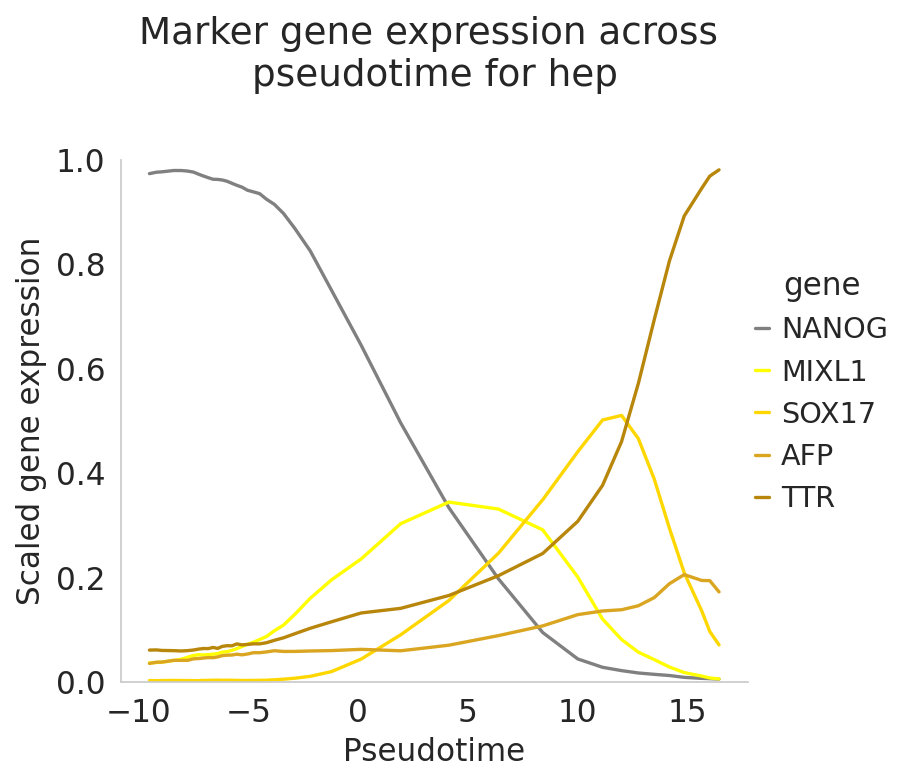

In [52]:
plot_marker_pseudo(adata,'hep')

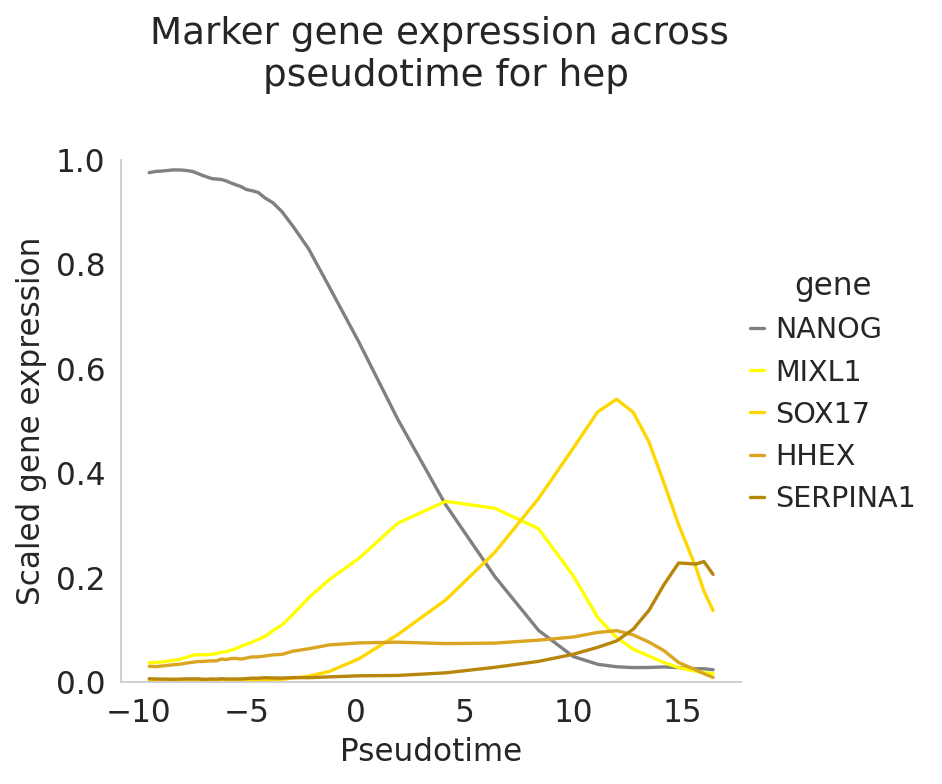

In [56]:
plot_marker_pseudo(adata,'hep',['NANOG','MIXL1','SOX17','HHEX','SERPINA1'])

In [ ]:
plot_marker_pseudo()

### old code

In [37]:
#obs_set = ['POU5F1','MIXL1','MESP1','GATA4','TNNT2','pc1_pseudotime']
#obs_set = ['POU5F1','SOX2','PAX6','DCX','RBFOX3', ]
obs_set = ['POU5F1','MIXL1','SOX17','ALB','HNF4A','pc1_pseudotime']
df = sc.get.obs_df(adata, obs_set).sort_values('pc1_pseudotime')
#df

In [27]:
obs_set.remove('pc1_pseudotime')
df_scaled = normalize(df.drop('pc1_pseudotime',axis=1),norm='max')
df_scaled = pd.DataFrame(df_scaled, columns = obs_set, index=df.index)
df_scaled['pc1_pseudotime'] = df['pc1_pseudotime']
df_scaled

,POU5F1,MIXL1,SOX17,ALB,HNF4A,pc1_pseudotime
cell,,,,,,
TGGGAGAAGGCCTTGC-114,1.0,0.000000,0.0,0.0,0.0,-13.439630
TACATTCGTAGTGATA-70,1.0,0.000000,0.0,0.0,0.0,-13.346182
ACCCAAAGTTATCCAG-68,1.0,0.000000,0.0,0.0,0.0,-12.875995
CTCATTAGTCGACTGC-61,1.0,0.000000,0.0,0.0,0.0,-12.846722
GTGACGCCATCATCTT-15,1.0,0.653874,0.0,0.0,0.0,-12.666777
...,...,...,...,...,...,...
GGTCTGGCACTTGAGT-44,0.0,0.000000,0.0,0.0,0.0,19.380259
CTGCCTAGTACGTAGG-38,0.0,0.000000,0.0,0.0,0.0,19.410490
AGGCCACAGTACGAGC-82,0.0,0.000000,0.0,0.0,0.0,19.508194


In [28]:
window = round(df_scaled.shape[0]/10)
step = round(window/4)
smoothed = df_scaled.rolling(window=window, step=step, center=True, min_periods=1).mean()
df_sm = smoothed.melt('pc1_pseudotime', var_name='gene', value_name='exp')
df_sm

,pc1_pseudotime,gene,exp
0,-9.504500,POU5F1,0.999355
1,-9.182021,POU5F1,0.999570
2,-8.931500,POU5F1,0.999677
3,-8.401265,POU5F1,0.999892
4,-8.051556,POU5F1,1.000000
...,...,...,...
200,14.178112,HNF4A,0.355663
201,14.853358,HNF4A,0.360660
202,15.646715,HNF4A,0.315952
203,16.015880,HNF4A,0.293744


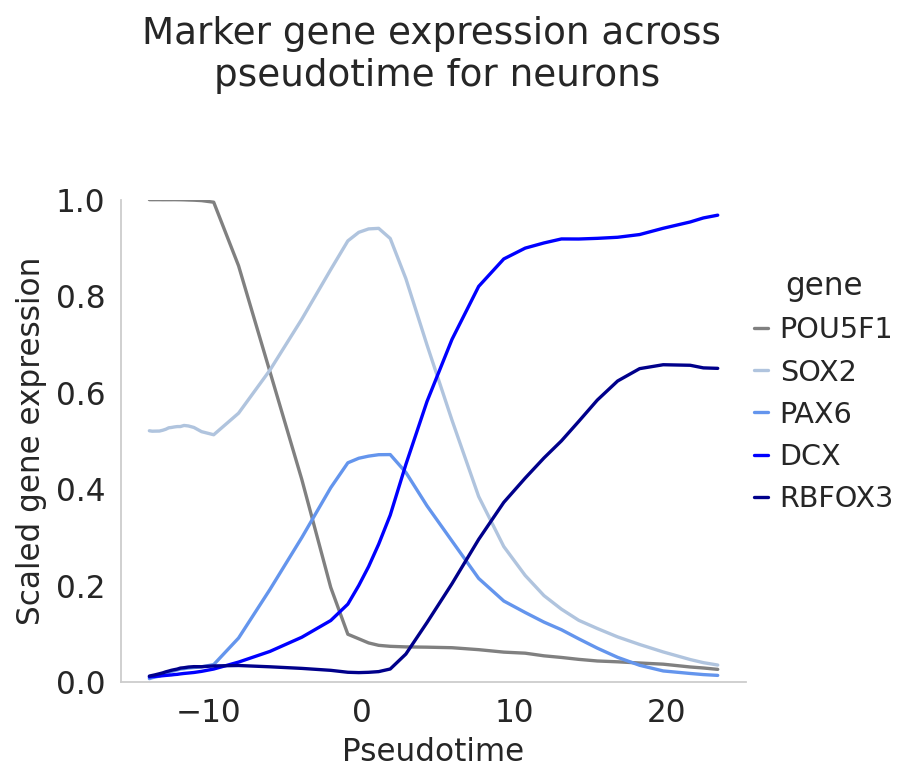

In [21]:
palette ={"POU5F1": "gray", "SOX2": "lightsteelblue", "PAX6": "cornflowerblue", "DCX": "blue", "RBFOX3":"darkblue"}

n_dyn = sns.relplot(x='pc1_pseudotime',y='exp', hue='gene',data=df_sm, kind='line', palette=palette)
n_dyn.set(ylim=(0, 1))
n_dyn.fig.subplots_adjust(top=0.75)
n_dyn.fig.suptitle('Marker gene expression across \npseudotime for neurons')
n_dyn.set_xlabels('Pseudotime')
n_dyn.set_ylabels('Scaled gene expression')

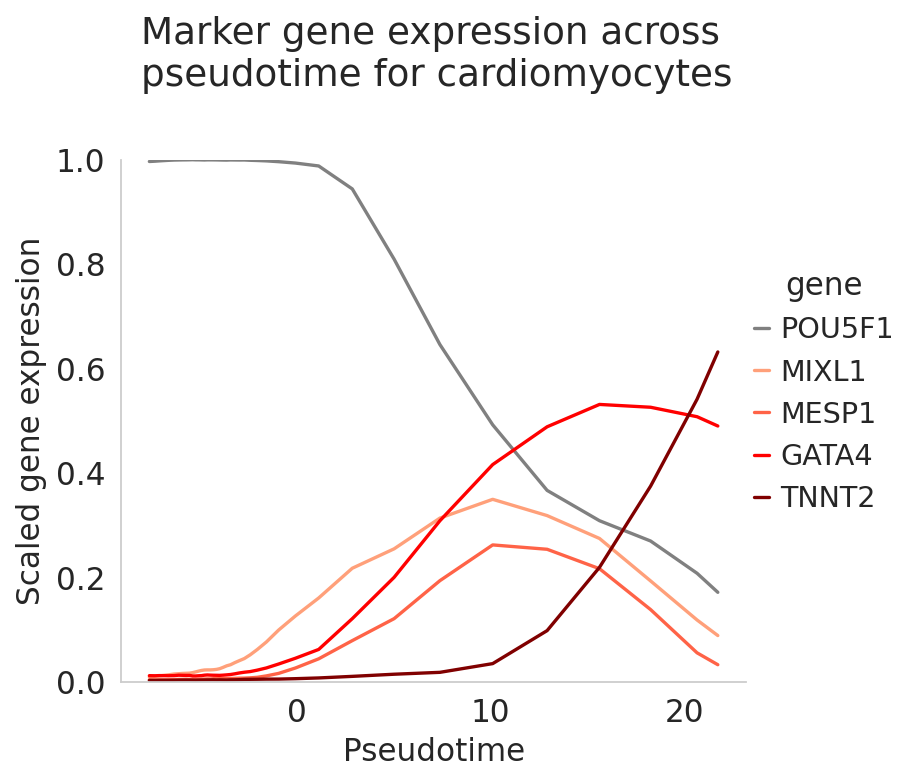

In [27]:
#palette ={"NANOG": "gray", "POU5F1": "lightgray", "MIXL1": "lightsalmon", "MESP1": "tomato", "GATA4":"red","TNNT2":"maroon"}
palette ={"POU5F1": "gray", "MIXL1": "lightsalmon", "MESP1": "tomato", "GATA4":"red","TNNT2":"maroon"}

cm_dyn = sns.relplot(x='pc1_pseudotime',y='exp', hue='gene',data=df_sm, kind='line', palette=palette)
cm_dyn.set(ylim=(0, 1))
cm_dyn.fig.subplots_adjust(top=0.8)
cm_dyn.fig.suptitle('Marker gene expression across \npseudotime for cardiomyocytes')
cm_dyn.set_xlabels('Pseudotime')
cm_dyn.set_ylabels('Scaled gene expression')

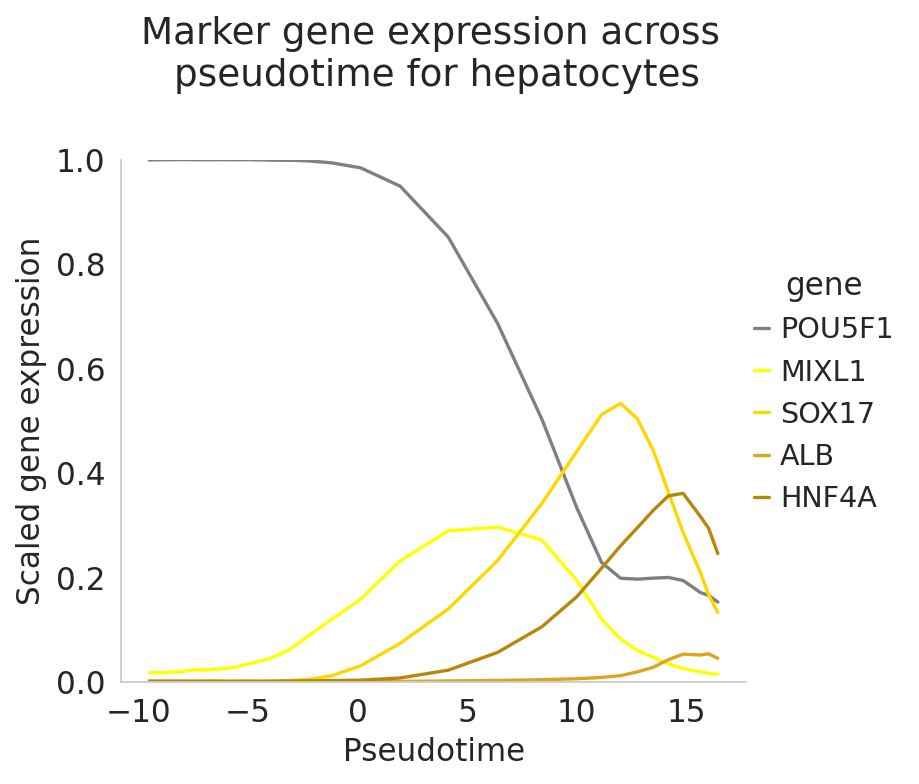

In [29]:
palette ={"POU5F1": "gray", "MIXL1": "yellow", "SOX17": "gold", "ALB":"goldenrod","HNF4A":"darkgoldenrod"}

cm_dyn = sns.relplot(x='pc1_pseudotime',y='exp', hue='gene',data=df_sm, kind='line', palette=palette)
cm_dyn.set(ylim=(0, 1))
cm_dyn.fig.subplots_adjust(top=0.8)
cm_dyn.fig.suptitle('Marker gene expression across \npseudotime for hepatocytes')
cm_dyn.set_xlabels('Pseudotime')
cm_dyn.set_ylabels('Scaled gene expression')

- scale expression
- connect dots
- pretty colors